# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox, zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import joblib
import warnings as wr
wr.filterwarnings("ignore")

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.shape

(1599, 12)

In [5]:
df.info() # to know the missing values n data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.dtypes # cheaking datatypes of all columns

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
columns=df.columns # features of data
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.describe()   # statistical summary

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Exploratort Data Analysis

In [9]:
df.isnull().sum() #checking missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

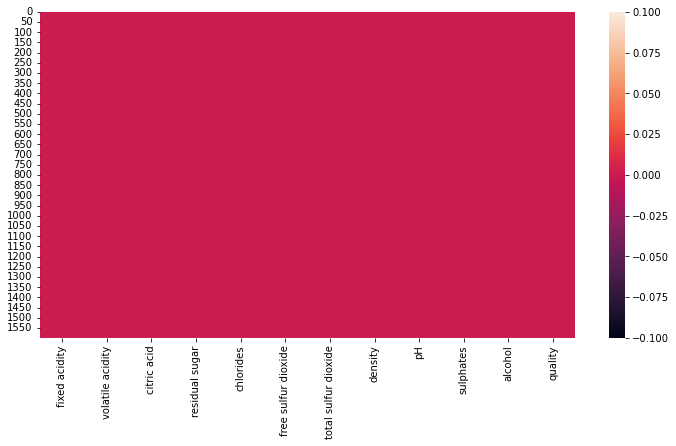

In [11]:
plt.figure(figsize=(12,6)) #another way to check missing values
sns.heatmap(df.isnull())
plt.show()

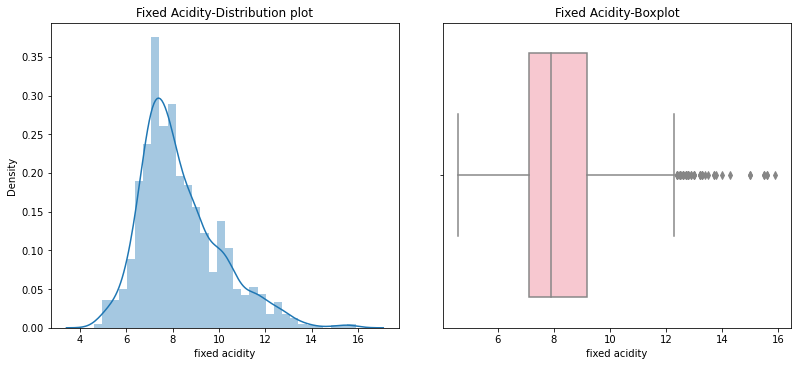

In [12]:
plt.figure(figsize=(12,6)) # visualizing fixed acidity feature by boxplot nd distplot
plt.subplot(1,2,1)
sns.distplot(df['fixed acidity'])
plt.title('Fixed Acidity-Distribution plot')

plt.subplot(1,2,2)
sns.boxplot(df['fixed acidity'], color='pink')
plt.title("Fixed Acidity-Boxplot")

plt.tight_layout(pad=4)
plt.show()

# Checking outliers

All Features-Boxplot


<function matplotlib.pyplot.show(close=None, block=None)>

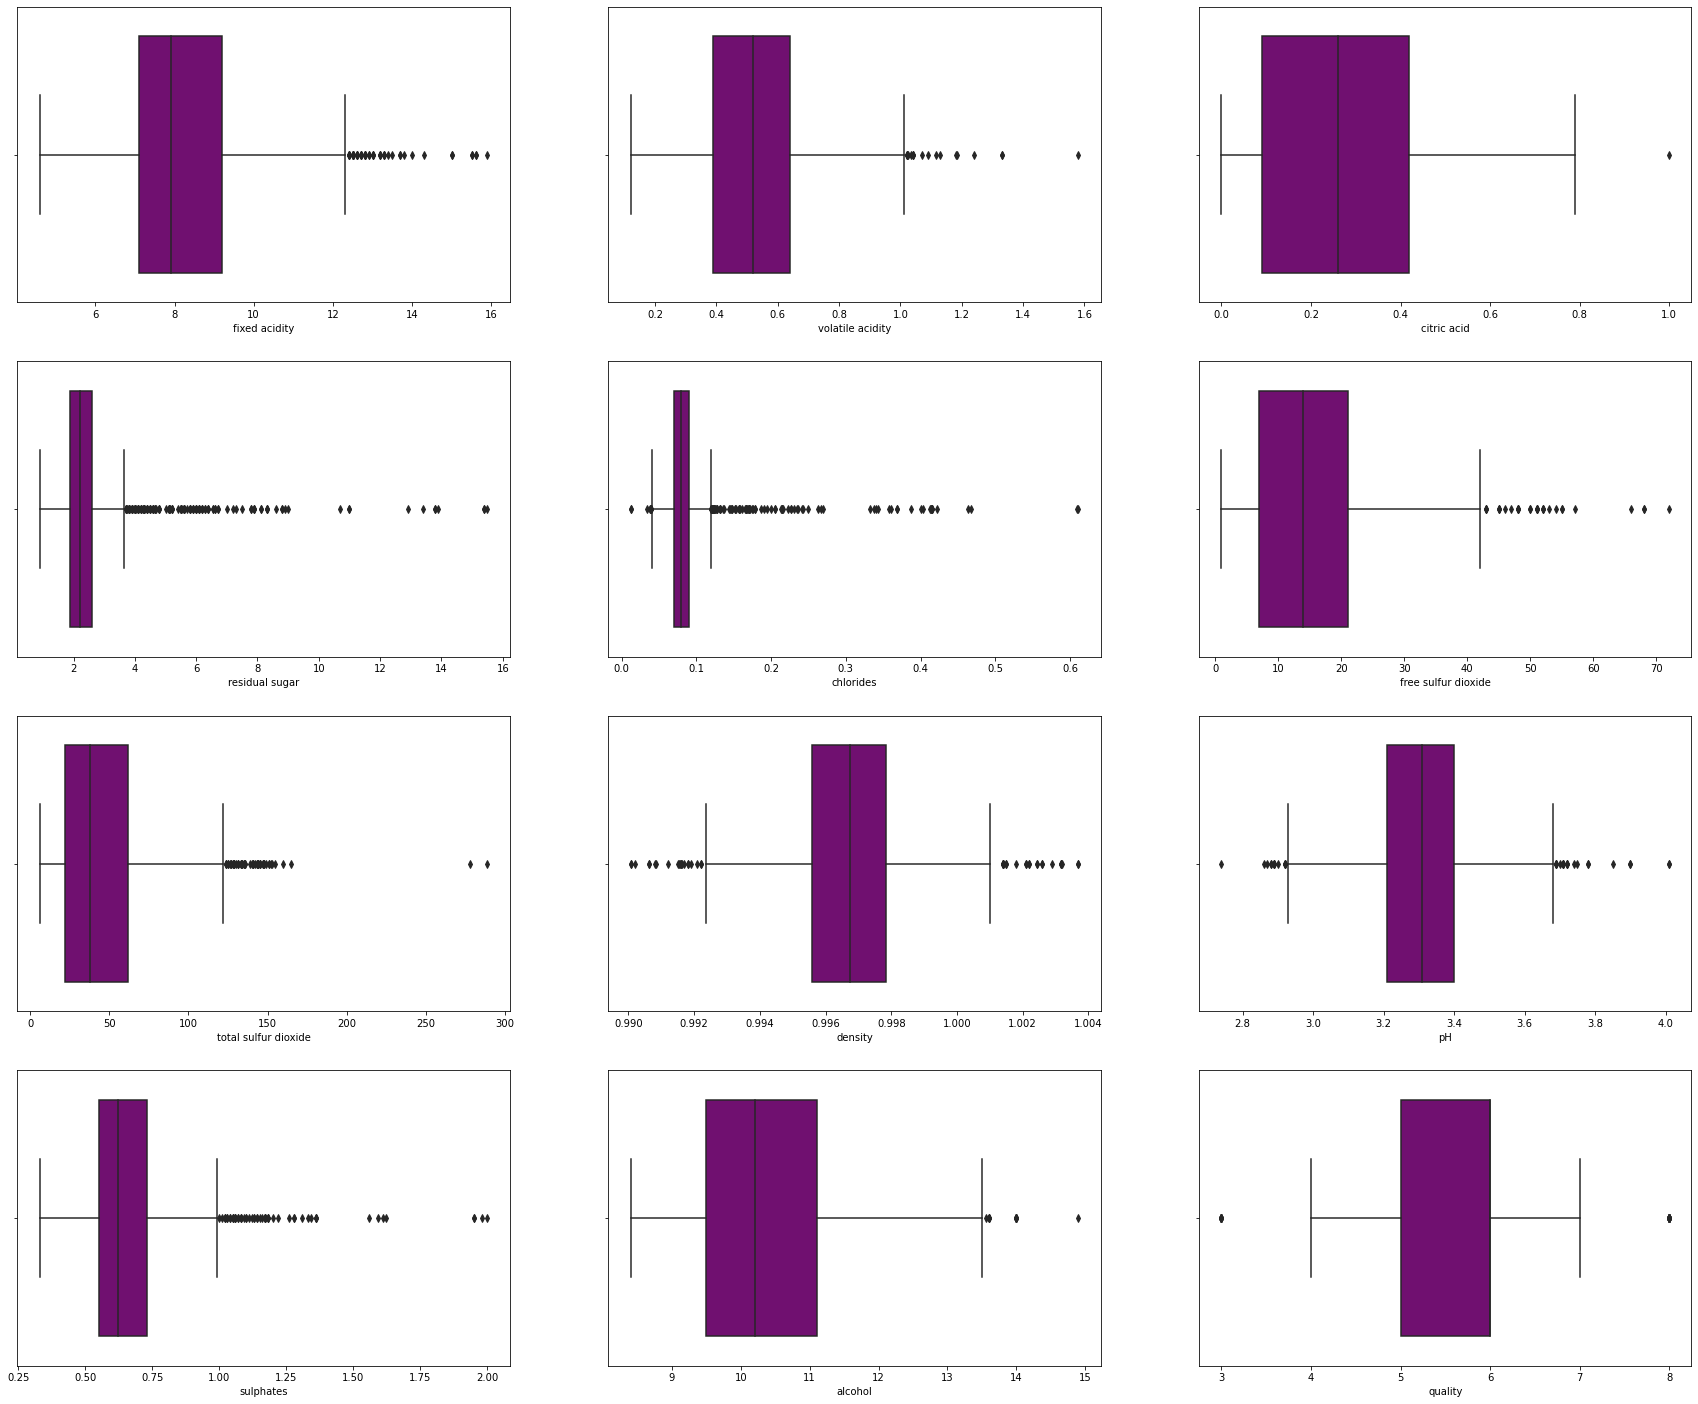

In [13]:
plt.figure(figsize=(30,25)) #Checking outliers using boxplot
for i in range(0, len (columns)):
    plt.subplot(4,3, i+1)
    sns.boxplot(df[columns[i]], color='purple')
print('All Features-Boxplot')
plt.show



# Checking Skewness

All Features- Distplot


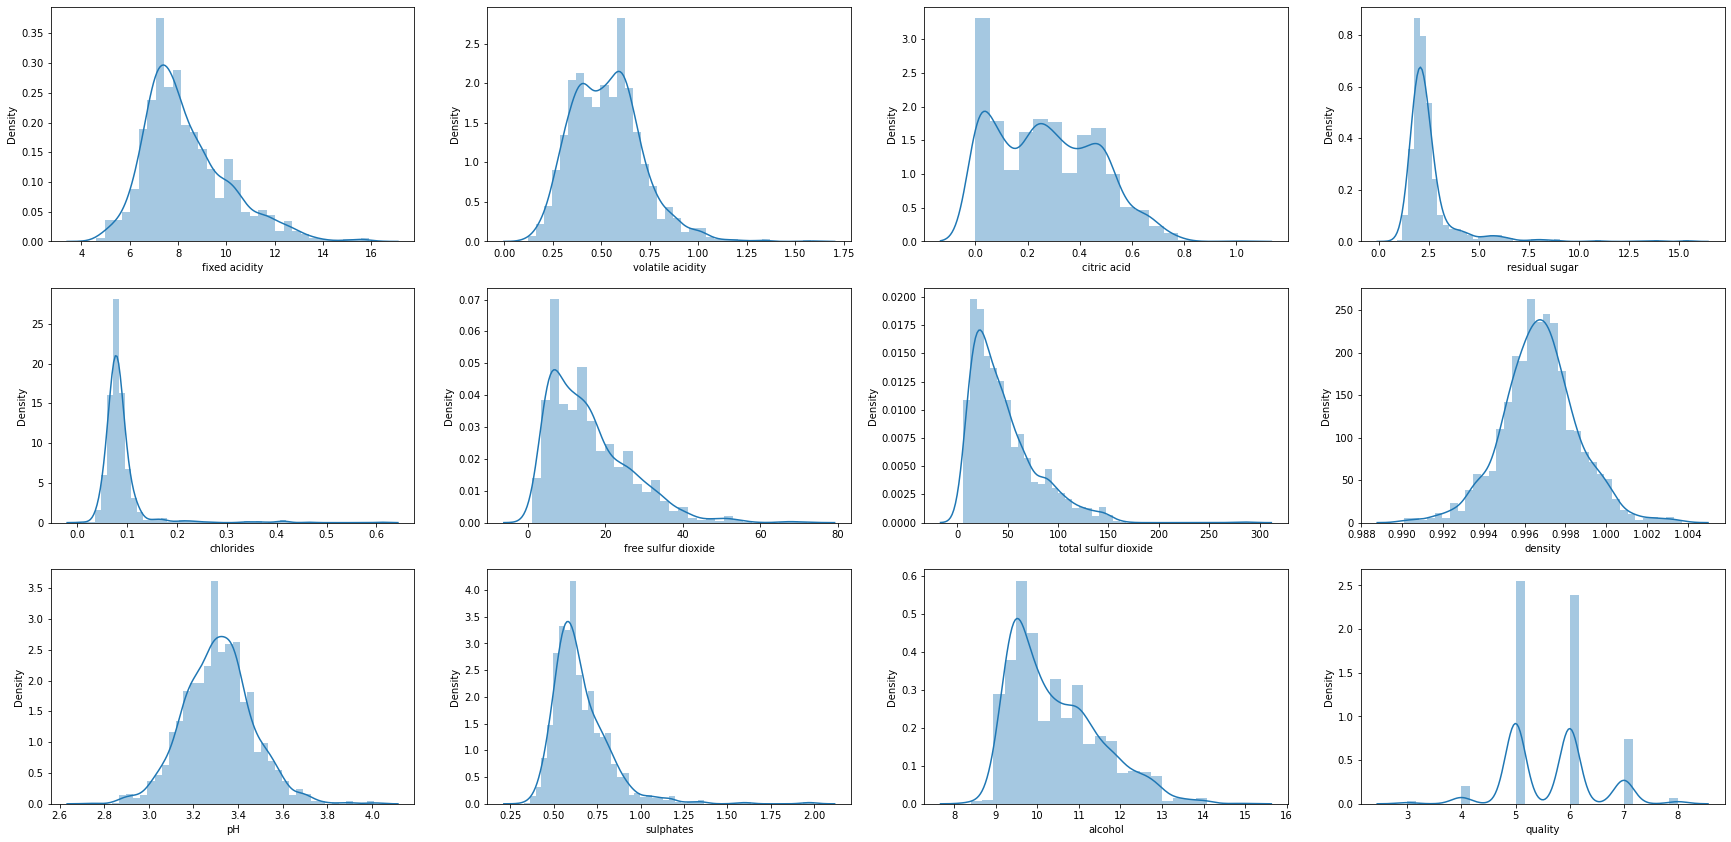

In [17]:
plt.figure(figsize=(30,25)) # using distplot
for i in range(0, len(columns)):
    plt.subplot(5,4,i+1)
    sns.distplot(df[columns[i]])
print('All Features- Distplot')
plt.show()

# Pairplot

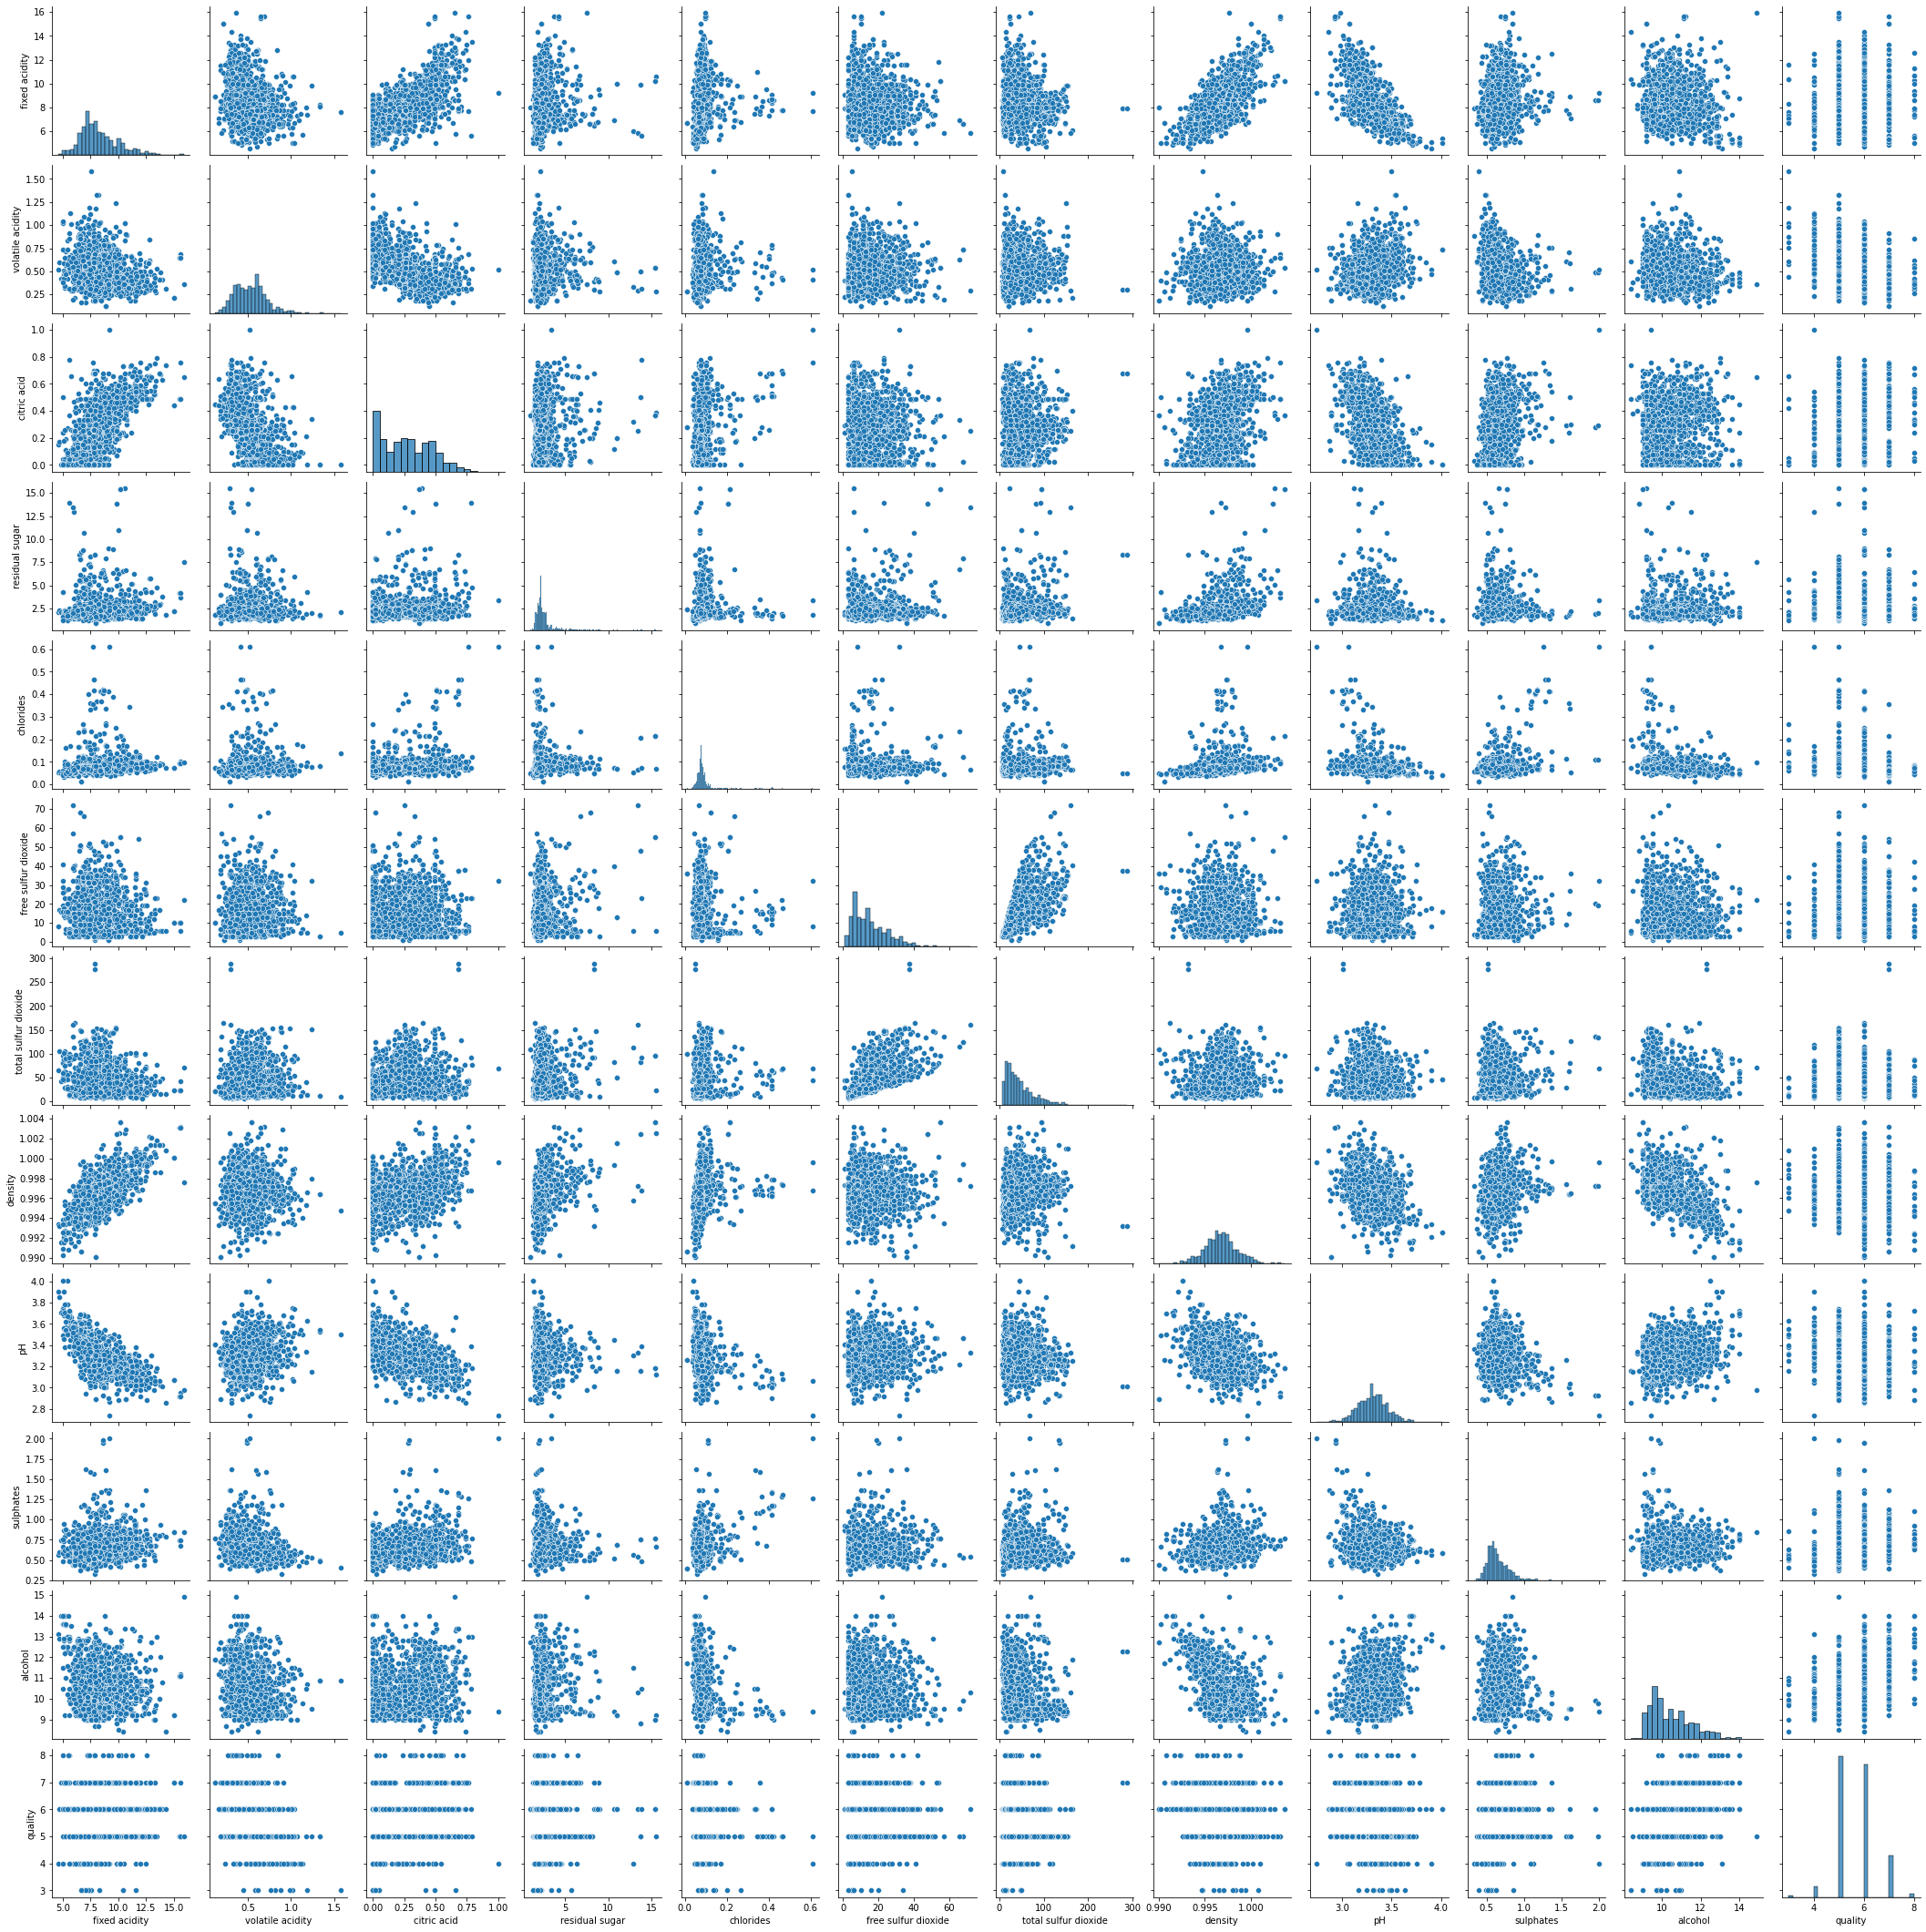

In [18]:
sns.pairplot(df) # visualizing data using pairplot

# Removing Outliers

In [21]:
z=np.abs(zscore(df)) #using z score for removing outliers and calucating absolute zscore
df_new=df[(z<4).all(axis=1)]
df_new.shape

(1537, 12)

# Percentage data loss

In [23]:
loss_percent=(1599-1451)/1599*100
print(loss_percent)

9.255784865540964


# Distribution plots

All features-Distplot


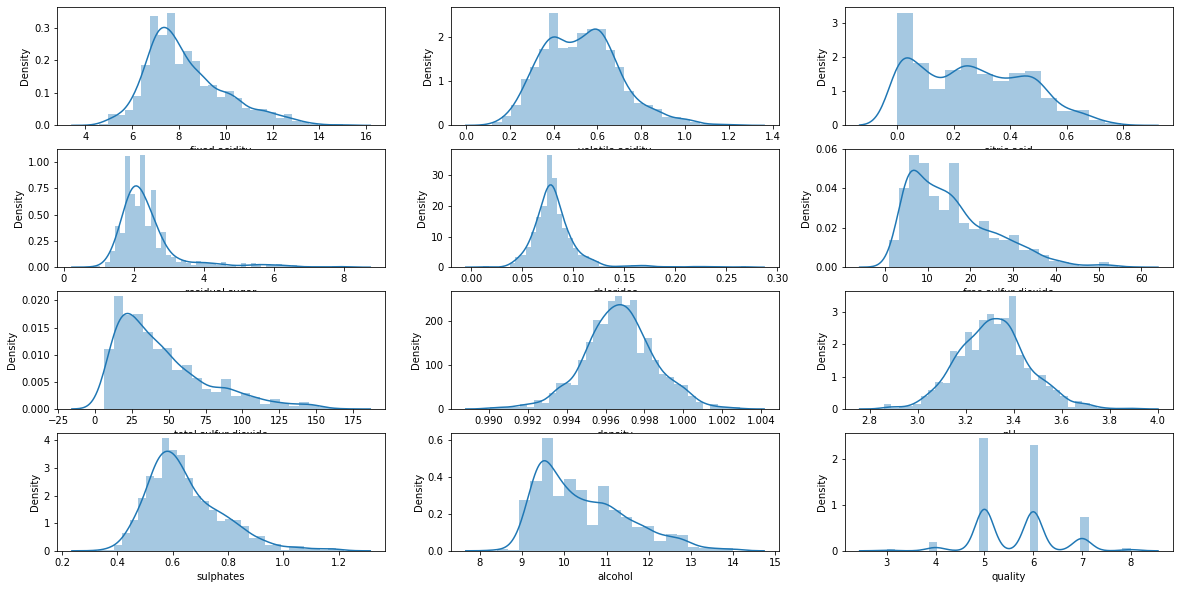

In [25]:
plt.figure(figsize=(20,10)) # visualizing all features by using distplot
for i in range(0, len(columns)):
    plt.subplot(4,3, i+1)
    sns.distplot(df_new[columns[i]])
print('All features-Distplot')
plt.show()

# Correlation matrix

In [26]:
df_new.corr() # multivariate analysis

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.276854     0.694992   
volatile acidity          -0.276854          1.000000    -0.566741   
citric acid                0.694992         -0.566741     1.000000   
residual sugar             0.145177          0.074296     0.150968   
chlorides                  0.156224          0.117307     0.091602   
free sulfur dioxide       -0.153435          0.000273    -0.075496   
total sulfur dioxide      -0.107979          0.108983     0.012648   
density                    0.667833          0.029748     0.369562   
pH                        -0.702413          0.237415    -0.524540   
sulphates                  0.210457         -0.322255     0.302830   
alcohol                   -0.072929         -0.217113     0.132680   
quality                    0.133260         -0.389619     0.239041   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.145177   0.156224            -0.153435   
volatile acidity            0.074296   0.117307             0.000273   
citric acid                 0.150968   0.091602            -0.075496   
residual sugar              1.000000   0.103839             0.055396   
chlorides                   0.103839   1.000000            -0.047919   
free sulfur dioxide         0.055396  -0.047919             1.000000   
total sulfur dioxide        0.133257   0.054353             0.671402   
density                     0.353109   0.299642            -0.058363   
pH                         -0.066616  -0.180310             0.092302   
sulphates                   0.063070   0.073564             0.051691   
alcohol                     0.092580  -0.223416            -0.059021   
quality                     0.009398  -0.146462            -0.055757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.107979  0.667833 -0.702413   0.210457   
volatile acidity                  0.108983  0.029748  0.237415  -0.322255   
citric acid                       0.012648  0.369562 -0.524540   0.302830   
residual sugar                    0.133257  0.353109 -0.066616   0.063070   
chlorides                         0.054353  0.299642 -0.180310   0.073564   
free sulfur dioxide               0.671402 -0.058363  0.092302   0.051691   
total sulfur dioxide              1.000000  0.089059 -0.026439  -0.013848   
density                           0.089059  1.000000 -0.329001   0.155174   
pH                               -0.026439 -0.329001  1.000000  -0.057070   
sulphates                        -0.013848  0.155174 -0.057070   1.000000   
alcohol                          -0.231712 -0.505312  0.191815   0.205511   
quality                          -0.214517 -0.181234 -0.071483   0.348849   

                       alcohol   quality  
fixed acidity        -0.072929  0.133260  
volatile acidity     -0.217113 -0.389619  
citric acid           0.132680  0.239041  
residual sugar        0.092580  0.009398  
chlorides            -0.223416 -0.146462  
free sulfur dioxide  -0.059021 -0.055757  
total sulfur dioxide -0.231712 -0.214517  
density              -0.505312 -0.181234  
pH                    0.191815 -0.071483  
sulphates             0.205511  0.348849  
alcohol               1.000000  0.488768  
quality               0.488768  1.000000

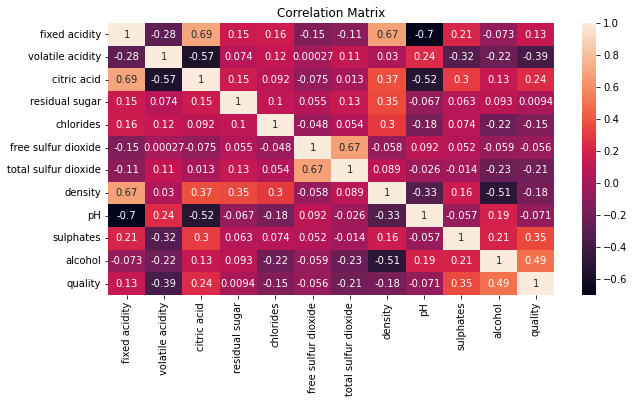

In [27]:
plt.figure(figsize=(10,5)) #visualizing correlation by heatmap
sns.heatmap(df_new.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

# Scatter Plots

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

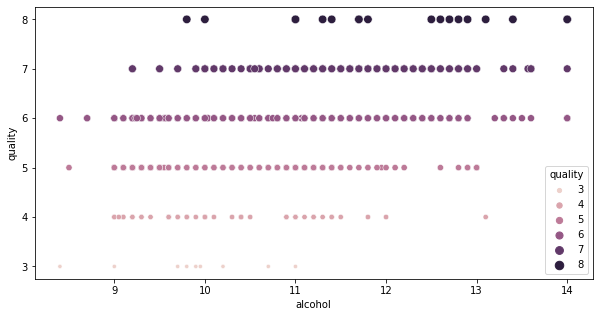

In [28]:
plt.figure(figsize=(10,5))  #Visualizing the relation between target and features using scatter plot
sns.scatterplot(x =df_new['alcohol'], y= df_new['quality'], hue = df_new['quality'],     #example of bivariate analysis
                size= df_new['quality'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

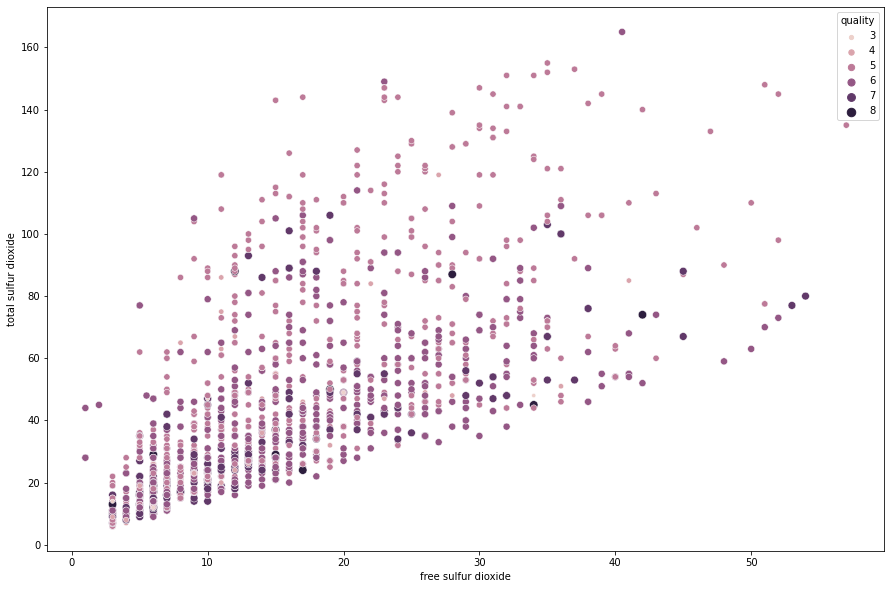

In [30]:
#visualizing relation between free sulfur dioxide and total sulfur dioxide
plt.figure(figsize=(15,10))                                           #example of bivariate analysis
sns.scatterplot(x = df_new['free sulfur dioxide'], y= df_new['total sulfur dioxide'], hue =df_new['quality'],
           size =df_new['quality'])

# Data Imbalance

<AxesSubplot:xlabel='quality', ylabel='count'>

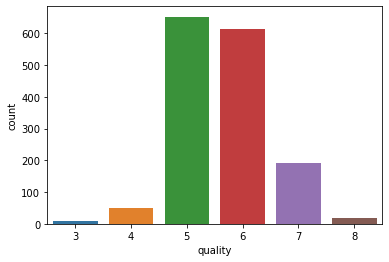

In [32]:
sns.countplot(x="quality", data= df_new) # visualizing the data imbalance by countplot(univariate analysis)

# Dividing the dataset

In [33]:
df["Quality"]=0
df.loc[df['quality']>7, 'Quality']=1
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Quality  
0      9.4        5        0  
1      9.8        5        0  
2      9.8        5        0  
3      9.8        6        0  
4      9.4        5        0

# Countplot

In [35]:
df["Quality"].value_counts() #check unique target variables and dropping the target class
df.drop('quality', axis=1, inplace=True)

# Oversampling

In [37]:
#splitting into attributes and target
x = df[df['Quality']==0]
y = df[df['Quality']==1]

#data balancing
upsampled = resample(y, replace=True, n_samples=x.shape[0])
df_new = pd.concat([x, upsampled])
df_new =shuffle(df_new)

The new data set has been splitted into x and y variables, x being the features and y being the target.

<AxesSubplot:xlabel='Quality', ylabel='count'>

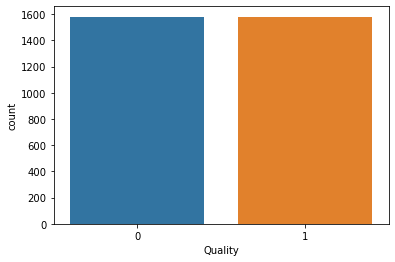

In [38]:
# To visualize the xlabel and ylabel by countplot
sns.countplot(df_new["Quality"])

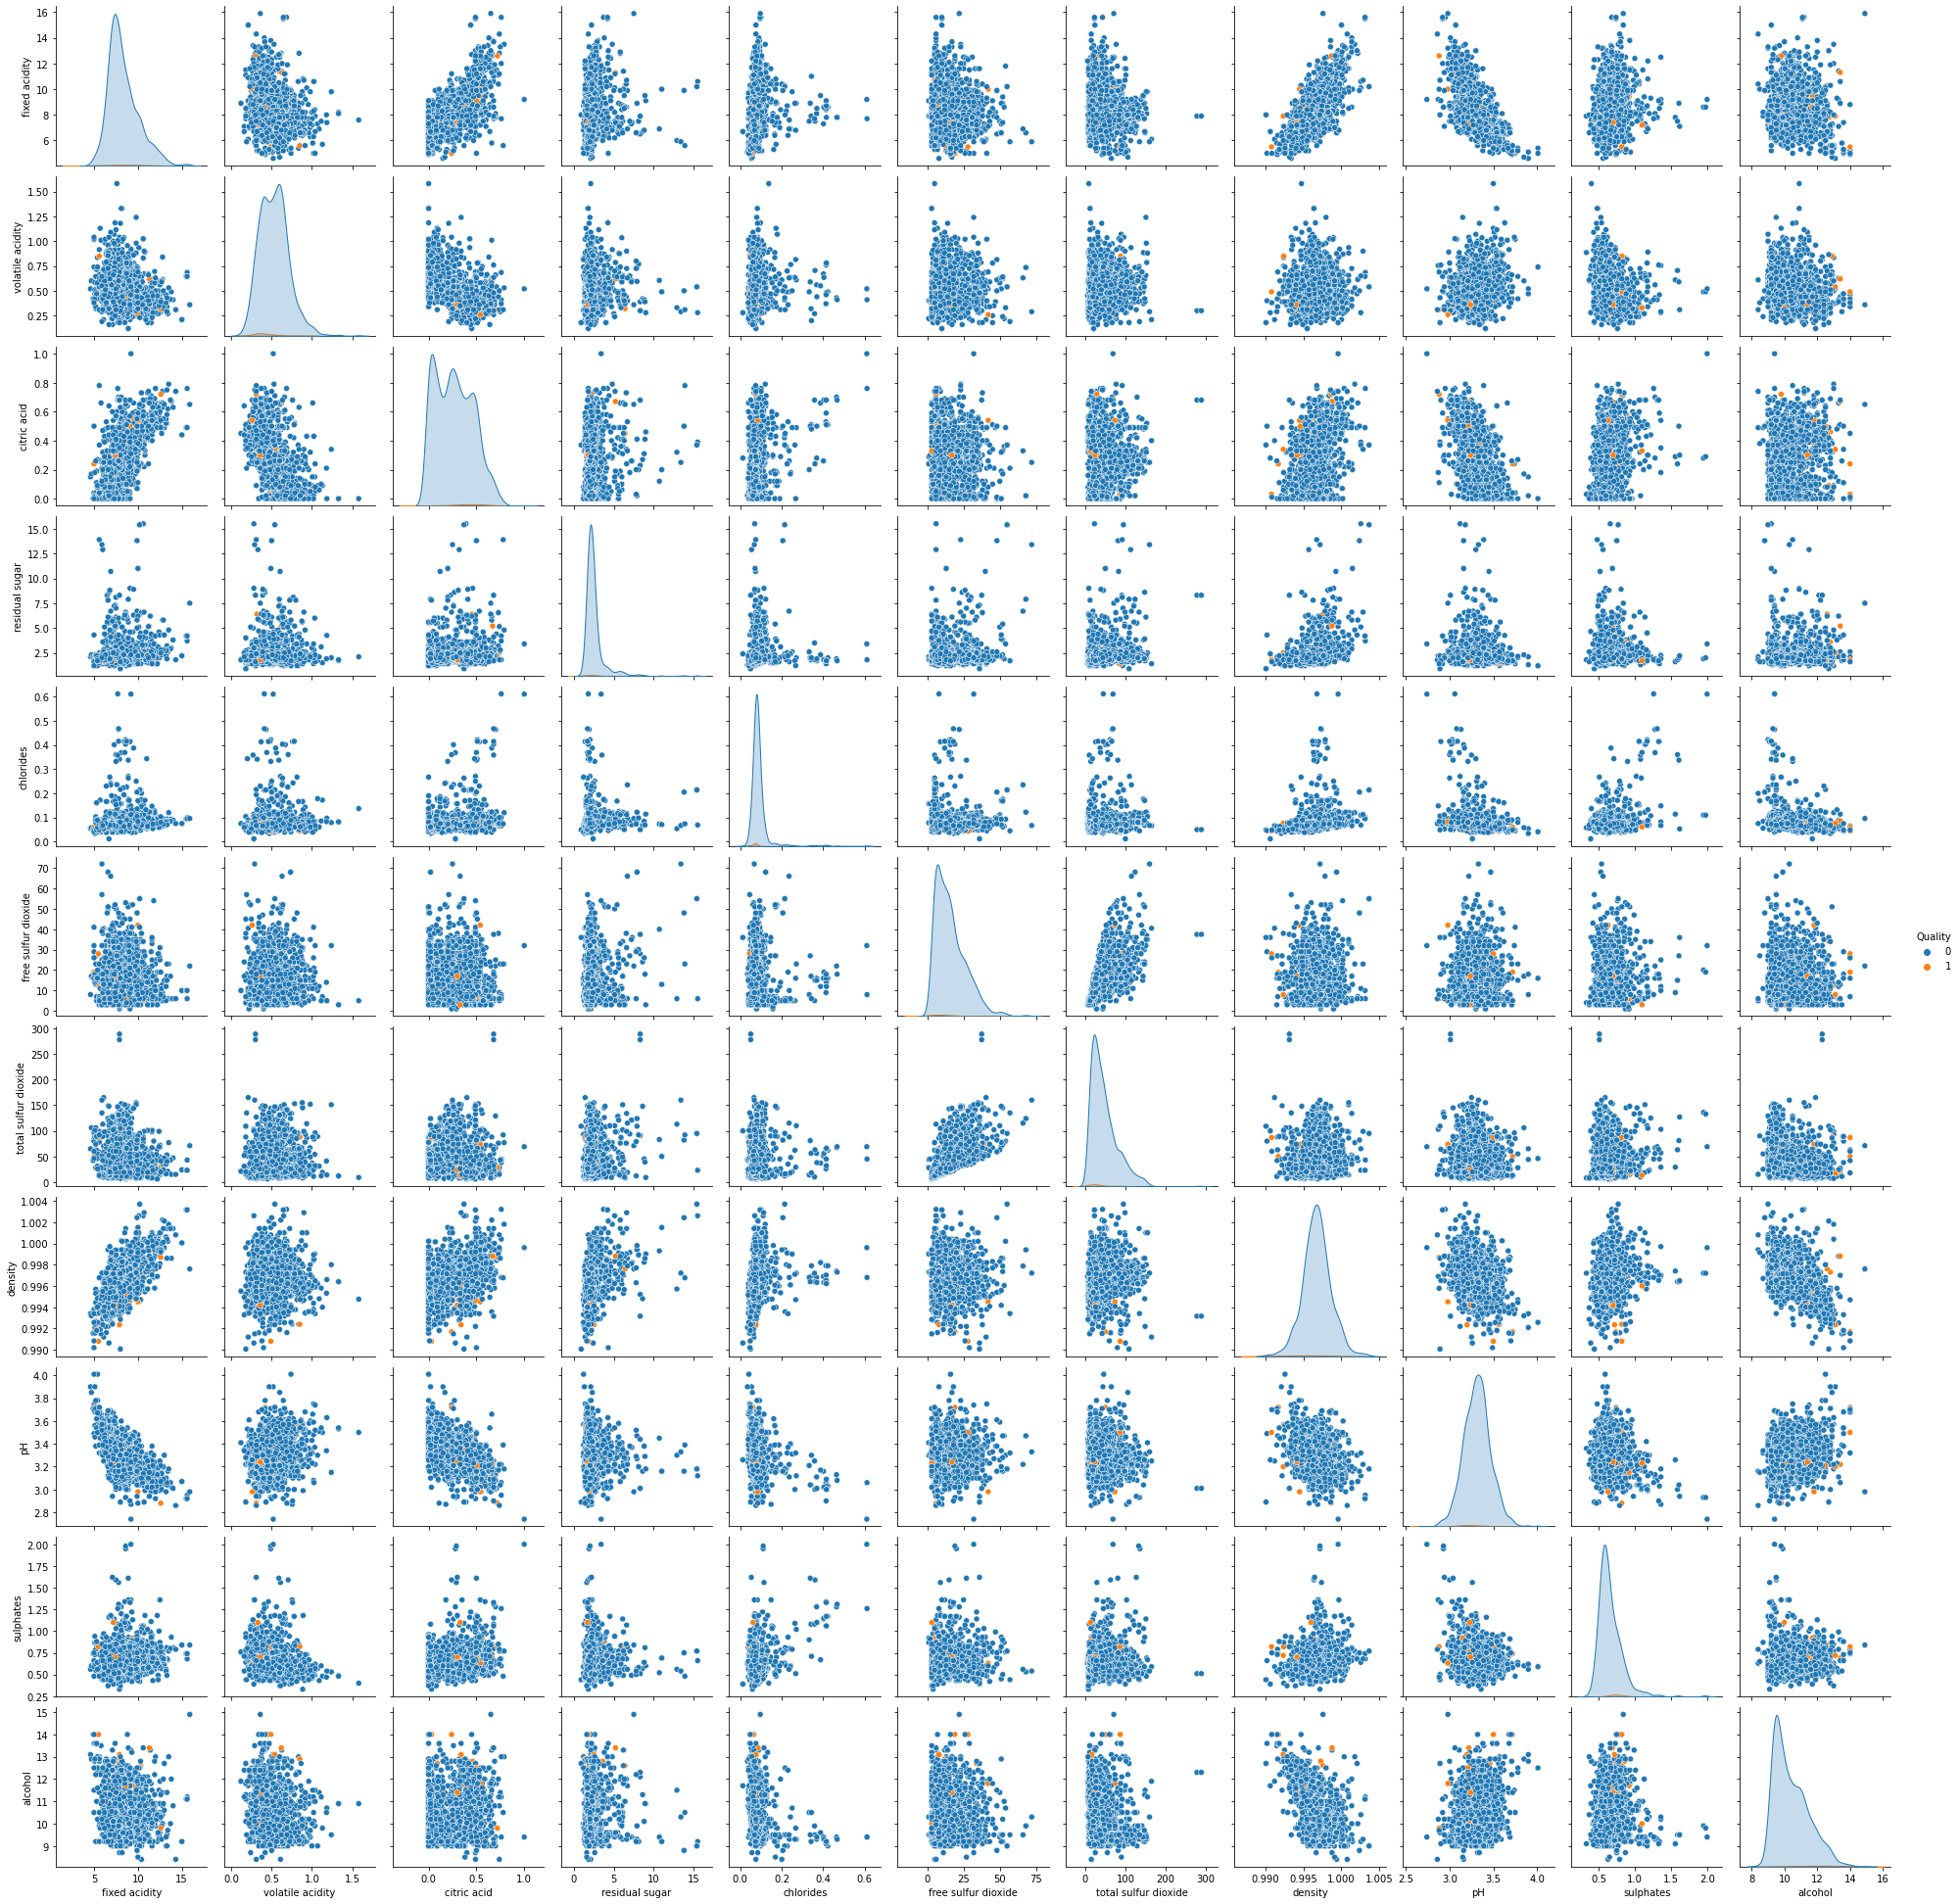

In [41]:
 sns.pairplot(df, hue='Quality') #Another visualization by pairplot

# Scaling 

In [43]:
X = df_new.drop('Quality', axis=1) # scaling by using train test split 
y= df_new ['Quality']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [44]:
#StandardScaler
ss =StandardScaler()
X_train =ss.fit_transform(X_train.values)
X_test=ss.fit_transform(X_test.values)
X_train=pd.DataFrame(X_train, columns= X.columns)
X_test=pd.DataFrame(X_test, columns=X.columns)
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.497078          0.917289    -0.297008       -0.428174   0.137604   
1       0.493306         -1.044156     1.125594        0.198318   0.053117   
2      -0.288576         -1.400782     0.340710       -0.741420  -0.622774   
3       0.336930         -1.103593    -0.002677       -0.389018  -0.425639   
4      -0.027949          1.422510    -0.640395       -0.114928  -0.059531   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.226190              1.714381  0.068095 -0.158414  -0.849941   
1            -0.802734             -0.765414  0.174704 -0.787972   1.299560   
2            -0.335041             -0.497328  0.307966  0.184982   0.983457   
3            -0.147964             -0.430306 -0.376109 -0.158414   0.793795   
4            -0.428580             -0.061688  0.596698  0.127749  -0.470618   

    alcohol  
0 -1.016585  
1  0.329644  
2 -1.795981  
3  0.329644  
4 -1.300002

In [45]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.033577         -0.813179     1.169080        0.688184   2.641021   
1      -1.622248          0.097977    -1.505133       -0.556821  -0.957390   
2       0.979377         -0.934666     0.536993        2.457401  -0.154667   
3       2.225989         -0.995410     1.849789       -0.294714  -0.182347   
4      -0.104634          1.100248    -1.067534       -0.229188   0.122133   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.770622             -0.768981  0.416851 -0.568005  -0.069710   
1             1.358046              1.684803 -2.447045  1.246116   0.762868   
2            -0.867380             -0.872662  0.694002 -0.333925   0.762868   
3            -0.770622             -0.319697  1.202112 -2.382126   0.762868   
4             0.100197              2.583372  0.232083 -0.685045  -0.347237   

    alcohol  
0  0.028059  
1  1.989457  
2  0.972436  
3 -1.061606  
4 -1.061606

In [48]:
from xgboost import XGBClassifier

# Building the model

In [49]:
key = ['KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'XGBClassifier', 'SVC']
value = [KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), XGBClassifier(), SVC()]

models = dict(zip(key,value))

Classification Problem by selecting the classification model as KNeighborsClassifier, LogisticRegression, RandomForestClassifier, GaussianNB, DecisionTreeClassifier, XGBClassifier and SVC. We will fit the training and testing data one by one into the model and compare its accuracy.

# Model Selection

In [51]:
training_scores=[]
testing_scores=[]

for key, value in models.items():
    value.fit(X_train, y_train)
    train_score=value.score(X_train, y_train)
    test_score=value.score(X_test, y_test)
    training_scores.append(train_score)
    training_scores.append(test_score)
    
    print(f'{key}\n')
    print(f"Training Score: {train_score}")
    print(f"Testing_score: {test_score}\n")

KNeighborsClassifier

Training Score: 0.9913009094503756
Testing_score: 0.9842022116903634

RandomForestClassifier

Training Score: 1.0
Testing_score: 0.9162717219589257

GaussianNB

Training Score: 0.8438117833135627
Testing_score: 0.8214849921011058

DecisionTreeClassifier

Training Score: 1.0
Testing_score: 0.8515007898894155

XGBClassifier

Training Score: 1.0
Testing_score: 0.9794628751974723

SVC

Training Score: 0.9746935547647292
Testing_score: 0.976303317535545



# Cross Validation

In [52]:
cv_scores =[]
for key, value in models.items():
    cvs=cross_val_score(value, X,y, cv=5)
    
    cv_scores.append(cvs.mean())
    print(f'{key}\n')
    print(f"CV Score: {cvs.mean()} \n")      

KNeighborsClassifier

CV Score: 0.9835513028176056 

RandomForestClassifier

CV Score: 1.0 

GaussianNB

CV Score: 0.8459800627912092 

DecisionTreeClassifier

CV Score: 0.9939928410022597 

XGBClassifier

CV Score: 0.9971543983842261 

SVC

CV Score: 0.7817940488331633 



# Hyperparameter Tuning

 Tuning the Random Forest Classifier Model

In [53]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred=rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9541864139020537
[[314   1]
 [ 28 290]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       315
           1       1.00      0.91      0.95       318

    accuracy                           0.95       633
   macro avg       0.96      0.95      0.95       633
weighted avg       0.96      0.95      0.95       633



In [54]:
params = {'n_estimators': [10,100,200],
'max_depth': [10,50,100,150],
    'min_weight_fraction_leaf':[0,0.1,0.01],
        'ccp_alpha':[0,0.01,0.1]}
grid=GridSearchCV(rfc, param_grid=params, cv =5, verbose=1)

In [55]:
grid.fit(X,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0, 0.01, 0.1],
                         'max_depth': [10, 50, 100, 150],
                         'min_weight_fraction_leaf': [0, 0.1, 0.01],
                         'n_estimators': [10, 100, 200]},
             verbose=1)

In [56]:
grid.best_params_

{'ccp_alpha': 0,
 'max_depth': 50,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 100}

Now, we have got the best parameters

# Model Evaluation

In [58]:
#evaluation of random forest classifier
best=grid.best_estimator_
best.fit(X_train, y_train)
pred=best.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9541864139020537
[[314   1]
 [ 28 290]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       315
           1       1.00      0.91      0.95       318

    accuracy                           0.95       633
   macro avg       0.96      0.95      0.95       633
weighted avg       0.96      0.95      0.95       633



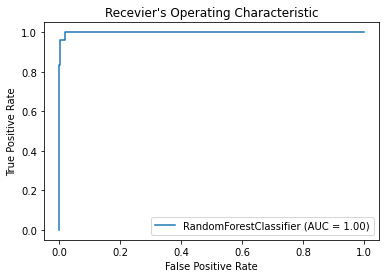

In [59]:
#AUC-ROC Curve
plot_roc_curve(best, X_test, y_test)
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Serialization

Saving the model

In [60]:
joblib.dump(best, "Red_Wine_Quality_Prediction_model.pkl")  #saving model as a pickle

['Red_Wine_Quality_Prediction_model.pkl']

# Conclusion

In [61]:
a=np.array(y_test)
predicted=np.array(best.predict(X_test))
df_com=pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a))) #creating data frame 
df_com

Original  Predicted
0           0          0
1           1          0
2           1          1
3           1          1
4           0          0
..        ...        ...
628         1          0
629         1          1
630         0          0
631         1          1
632         0          0

[633 rows x 2 columns]

# Loading the saved data

In [62]:
mod=joblib.load('Red_Wine_Quality_Prediction_model.pkl')

Random Forest Classifier

CV Score: 0.9996835443037975

Best model is Random Forest Classifier that we have 99.96% accuracy.

 